In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import gdown



In [ ]:
file_ids = {
    'train': '1v3p0txA9OSYt03lECxo0N6IeuxjT4ADJ',
    'test': '1_Qh9dmci6HeBj9DJNMJ-Bfvh87F_N5AK',
    'submission': '12JvvzdnBa-VMiSzQ8G9hUBUudbxbmh4Q'
}

# Download files
for name, file_id in file_ids.items():
    gdown.download(f'https://drive.google.com/uc?id={file_id}', f'{name}.csv', quiet=False)

# Read CSV files into pandas DataFrames
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

#load data from csv file and convert into data frame-DataFrame is a table-like data structure provided by the pandas library in Python.

Downloading...
From: https://drive.google.com/uc?id=1v3p0txA9OSYt03lECxo0N6IeuxjT4ADJ
To: /content/train.csv
100%|██████████| 988k/988k [00:00<00:00, 12.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_Qh9dmci6HeBj9DJNMJ-Bfvh87F_N5AK
To: /content/test.csv
100%|██████████| 421k/421k [00:00<00:00, 20.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=12JvvzdnBa-VMiSzQ8G9hUBUudbxbmh4Q
To: /content/submission.csv
100%|██████████| 22.7k/22.7k [00:00<00:00, 31.5MB/s]


In [ ]:
train.head()
#view first 5 rows


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train.info()
#see data types and null info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train.isnull().sum()
#Number of missing values per column



,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
train.shape


(7613, 5)

In [ ]:
train['keyword'].fillna('NoKeyword', inplace=True)
train['location'].fillna('NoLocation', inplace=True)
# Replaces null values in 'keyword' and 'location'



/tmp/ipython-input-17-1669432849.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['keyword'].fillna('NoKeyword', inplace=True)
/tmp/ipython-input-17-1669432849.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
train.isnull().sum()
#Number of missing values per column

,0
id,0
keyword,0
location,0
text,0
target,0


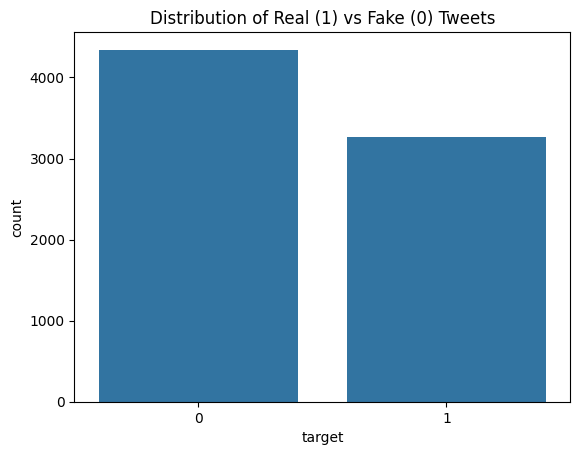

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=train)
plt.title('Distribution of Real (1) vs Fake (0) Tweets')
plt.show()
#Plots how many tweets are real (1) and fake (0)



In [ ]:
train['keyword'].value_counts().head(10)


,count
keyword,
NoKeyword,61
fatalities,45
deluge,42
armageddon,42
damage,41
body%20bags,41
harm,41
sinking,41
evacuate,40


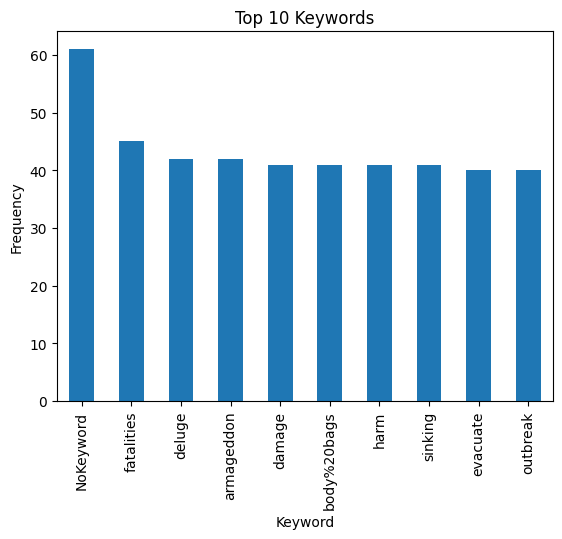

In [ ]:
train['keyword'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Keywords')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()
#Top 10 most common keywords in tweets

In [ ]:
train['location'].value_counts().head(10)


,count
location,
NoLocation,2533
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26


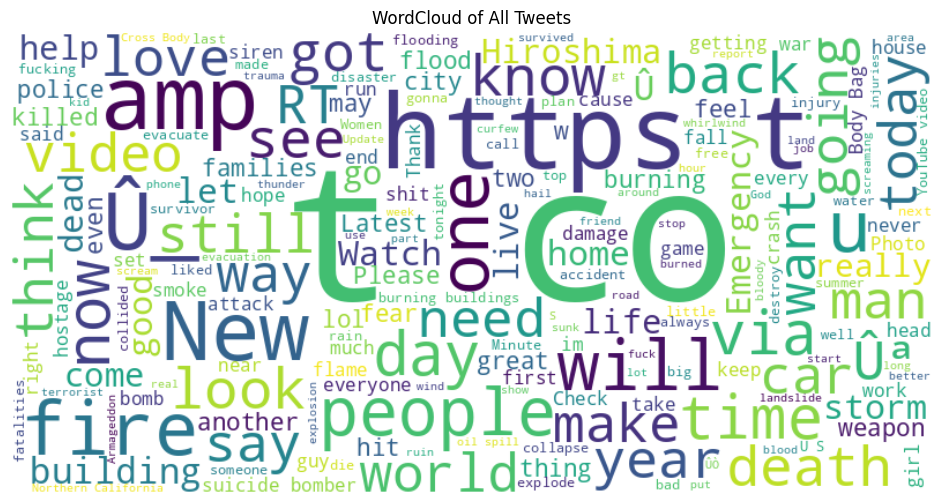

In [ ]:
from wordcloud import WordCloud

all_words = ' '.join(train['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of All Tweets')
plt.show()


In [ ]:
# Task 3: Text Preprocessing

import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # keep letters, remove others
    text = text.lower()                     # convert to lowercase
    text = text.split()                     # tokenize words
    return text


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words


In [ ]:
from nltk.stem import PorterStemmer
import spacy

stemmer = PorterStemmer()
nlp = spacy.load('en_core_web_sm')


In [ ]:
def stem_words(words):
    return [stemmer.stem(word) for word in words]
#Reduces words to root form (running → run)



In [ ]:
def lemmatize_words(words):
    doc = nlp(' '.join(words))
    return [token.lemma_ for token in doc]


In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    # words = lemmatize_words(words)  # if you prefer lemmatization
    return ' '.join(words)

# Apply to your dataset
train['clean_text'] = train['text'].apply(preprocess_text)


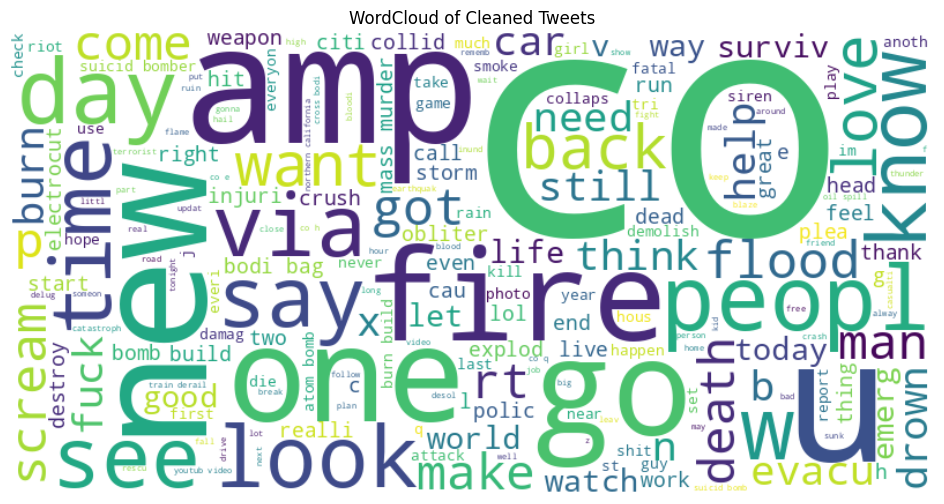

In [ ]:
all_words = ' '.join(train['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Cleaned Tweets')
plt.show()


In [ ]:
#task4 - feature extraction

from sklearn.feature_extraction.text import CountVectorizer

# Initialize vectorizer
vectorizer = CountVectorizer(max_features=5000)  # Use top 5000 words

# Fit and transform on training data
X_bow = vectorizer.fit_transform(train['clean_text'])

# Check shape (rows = number of tweets, columns = number of unique words)
X_bow.shape


#Converts text to vector of word counts (top 5000)



(7613, 5000)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform on training data
X_tfidf = tfidf_vectorizer.fit_transform(train['clean_text'])

# Check shape
X_tfidf.shape

# Converts text to weighted frequency vectors (better than BoW)



(7613, 5000)

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Encode a sample tweet
inputs = tokenizer("earthquake in city", return_tensors='pt')

# Get BERT embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Get the vector for [CLS] token (sentence representation)
cls_embedding = outputs.last_hidden_state[:, 0, :]

print(cls_embedding.shape)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

torch.Size([1, 768])


In [ ]:
#task5 - model building

from sklearn.model_selection import train_test_split

# Use TF-IDF features (you can use X_bow too)
X = X_tfidf
y = train['target']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shape
X_train.shape, X_test.shape


((6090, 5000), (1523, 5000))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Results:
[[769 105]
 [207 442]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       874
           1       0.81      0.68      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523

Accuracy: 0.7951411687458962


In [ ]:
from sklearn.svm import LinearSVC

# Initialize and train model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM Results:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Results:
[[726 148]
 [193 456]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       874
           1       0.75      0.70      0.73       649

    accuracy                           0.78      1523
   macro avg       0.77      0.77      0.77      1523
weighted avg       0.78      0.78      0.77      1523

Accuracy: 0.7760998030203545


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
print("Naive Bayes Results:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Results:
[[774 100]
 [200 449]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

Accuracy: 0.8030203545633617


In [ ]:
#checkong all
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return acc, prec, rec, f1, cm


# Logistic Regression
acc_lr, prec_lr, rec_lr, f1_lr, cm_lr = evaluate_model(y_test, y_pred_lr)

# SVM
acc_svm, prec_svm, rec_svm, f1_svm, cm_svm = evaluate_model(y_test, y_pred_svm)

# Naive Bayes
acc_nb, prec_nb, rec_nb, f1_nb, cm_nb = evaluate_model(y_test, y_pred_nb)


import pandas as pd

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM (LinearSVC)', 'Naive Bayes'],
    'Accuracy': [acc_lr, acc_svm, acc_nb],
    'Precision': [prec_lr, prec_svm, prec_nb],
    'Recall': [rec_lr, rec_svm, rec_nb],
    'F1-Score': [f1_lr, f1_svm, f1_nb]
})

# Display nicely
results = results.round(4)
results


#Naive Bayes achieved the best accuracy and precision overall

#Logistic Regression is a solid balanced option

#SVM is slightly behind both, though still competitive




,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.7951,0.8080,0.6810,0.7391
1,SVM (LinearSVC),0.7761,0.7550,0.7026,0.7279
2,Naive Bayes,0.8030,0.8179,0.6918,0.7496


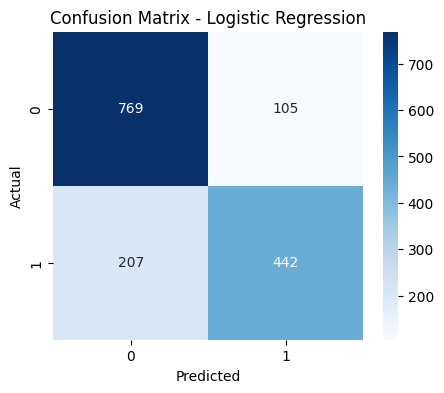

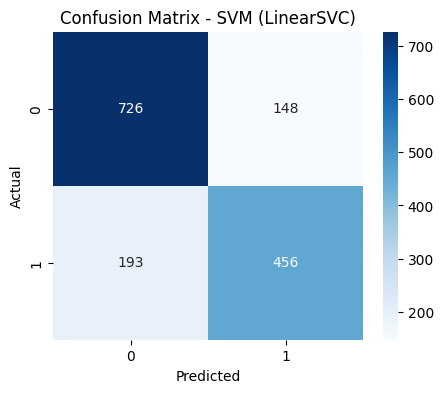

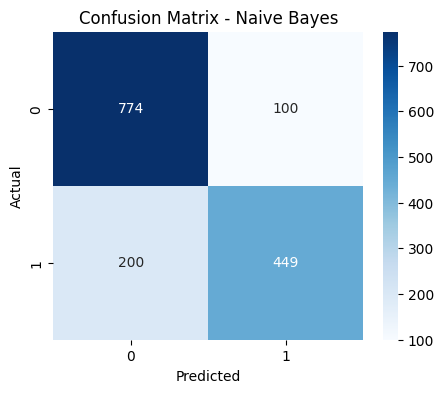

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion(cm, model_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for each model
plot_confusion(cm_lr, 'Logistic Regression')
plot_confusion(cm_svm, 'SVM (LinearSVC)')
plot_confusion(cm_nb, 'Naive Bayes')



In [ ]:
##Hyperparameter Tuning using grid search


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']  # required for L2 penalty
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Best estimator and parameters
print("Best Logistic Regression Params:", grid_lr.best_params_)

# Evaluate best model
y_pred_lr_tuned = grid_lr.predict(X_test)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
from sklearn.svm import LinearSVC

param_grid_svm = {
    'C': [0.01, 0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge']
}

grid_svm = GridSearchCV(LinearSVC(max_iter=10000), param_grid_svm, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Best estimator and parameters
print("Best SVM Params:", grid_svm.best_params_)

# Evaluate best model
y_pred_svm_tuned = grid_svm.predict(X_test)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best SVM Params: {'C': 1, 'loss': 'hinge'}


In [ ]:
def evaluate_model(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, prec, rec, f1

# Collect results
lr_metrics = evaluate_model(y_test, y_pred_lr_tuned)
svm_metrics = evaluate_model(y_test, y_pred_svm_tuned)

# Display comparison
tuned_results = pd.DataFrame({
    'Model': ['Logistic Regression (Tuned)', 'SVM (Tuned)'],
    'Accuracy': [lr_metrics[0], svm_metrics[0]],
    'Precision': [lr_metrics[1], svm_metrics[1]],
    'Recall': [lr_metrics[2], svm_metrics[2]],
    'F1-Score': [lr_metrics[3], svm_metrics[3]]
})

tuned_results.round(4)


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Tuned),0.7774,0.7566,0.7042,0.7294
1,SVM (Tuned),0.7958,0.7944,0.7026,0.7457


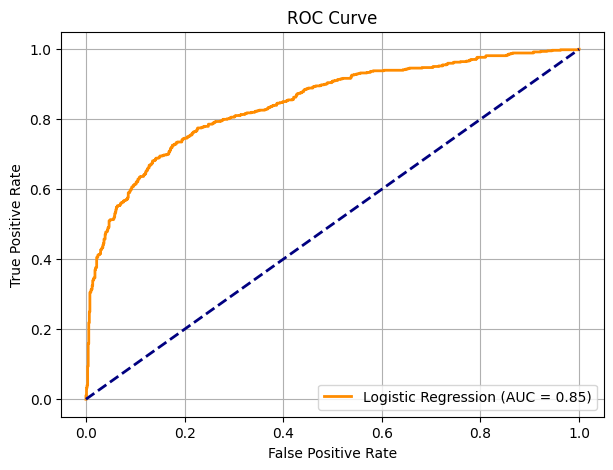

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get probability scores
y_probs_lr = grid_lr.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


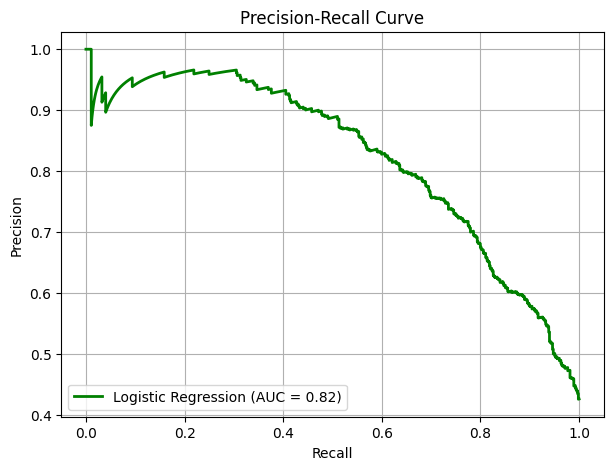

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_probs_lr)
pr_auc_lr = average_precision_score(y_test, y_probs_lr)

plt.figure(figsize=(7, 5))
plt.plot(recall_lr, precision_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {pr_auc_lr:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [ ]:
# Find indexes where prediction != actual
misclassified_indices = np.where(y_test != y_pred_lr_tuned)[0]

# Display first 10 misclassified tweets
for i in misclassified_indices[:10]:
    print(f"Tweet: {train.iloc[y_test.index[i]]['text']}")
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred_lr_tuned[i]}\n")


Tweet: So you have a new weapon that can cause un-imaginable destruction.
Actual: 1, Predicted: 0

Tweet: my favorite lady came to our volunteer meeting
hopefully joining her youth collision and i am excite http://t.co/Ij0wQ490cS
Actual: 1, Predicted: 0

Tweet: @brianroemmele UX fail of EMV - people want to insert and remove quickly like a gas pump stripe reader. 1 person told me it crashed the POS
Actual: 1, Predicted: 0

Tweet: AKILAH WORLD NEWS Cop pulls man from car to avoid this ... http://t.co/Vn2Fnmy7li
Actual: 1, Predicted: 0

Tweet: Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her
 
#FARRAKHAN #QUOTE
Actual: 0, Predicted: 1

Tweet: Escape The Heat (and the #ORShow) for a trail run on Desolation Loop you'll be glad you did http://t.co/n2ucNzh38P http://t.co/VU8fWYMw5r
Actual: 0, Predicted: 1

Tweet: illegal alien released by Obama/DHS 4 times Charged With Rape &amp; Murder of Santa Maria CA Woman Had Prior Off

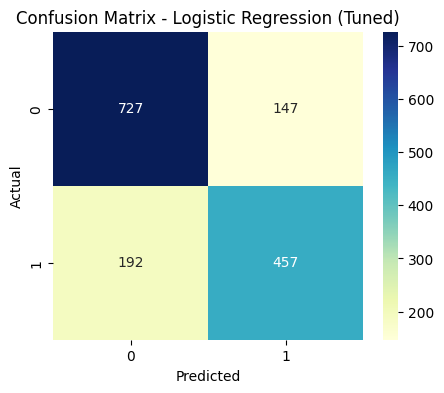

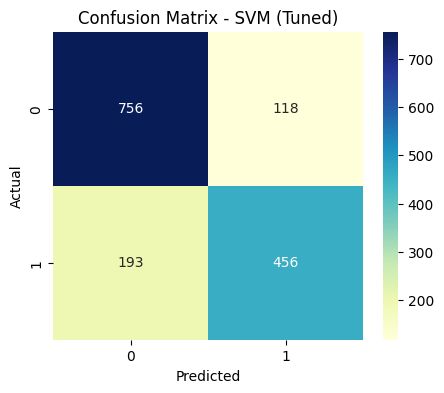

In [ ]:

import seaborn as sns

def plot_confusion(cm, model_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion matrices
plot_confusion(confusion_matrix(y_test, y_pred_lr_tuned), 'Logistic Regression (Tuned)')
plot_confusion(confusion_matrix(y_test, y_pred_svm_tuned), 'SVM (Tuned)')


In [ ]:
#streamlit app making(bonus)

In [ ]:
import joblib

# Save TF-IDF Vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# Save the trained Logistic Regression model
joblib.dump(grid_lr, 'fake_news_model.pkl')


['fake_news_model.pkl']

In [ ]:
import streamlit as st
import joblib
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not downloaded
nltk.download('stopwords')

# Load model and vectorizer
model = joblib.load('fake_news_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Streamlit App
st.title("Twitter Disaster News Classifier 🚨")

st.write("Enter a tweet text to check whether it is Real Disaster News or Not.")

# Input text box
user_input = st.text_area("Type a tweet here:", "")

if st.button("Predict"):
    if user_input.strip() == "":
        st.warning("Please enter some text.")
    else:
        # Preprocess input text
        clean_text = preprocess_text(user_input)

        # Vectorize
        text_vector = vectorizer.transform([clean_text])

        # Predict
        prediction = model.predict(text_vector)[0]

        # Show result
        if prediction == 1:
            st.success("✅ This is **Real Disaster News**.")
        else:
            st.error("❌ This is **Not Disaster News**.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-06-21 22:09:03.259 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 22:09:03.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 22:09:03.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 22:09:03.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 22:09:03.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 22:09:03.264 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 22:09:03.265 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.

In [ ]:
from google.colab import files

files.download('fake_news_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>